# TP 9 : Automates cellulaires

> Un automate cellulaire consiste en une grille (matrice) de cellules contenant chacune un état choisi parmi un ensemble fini et qui peut évoluer au cours du temps. L'état d'une cellule au temps $t+1$ dépend de l'état au temps $t$ des cellules adjacentes.

Nous aurons besoin de `numpy` :

In [1]:
import numpy as np

np.random.seed(42)

## Fonctions utilitaires

````{admonition} Question
 Écrire une fonction `bernouilli(p)` renvoyant $1$ avec une probabilité $p$ et $0$ avec une probabilité $1 - p$.  
On utilisera `np.random.rand()` pour générer un nombre aléatoire entre 0 et 1
````

````{admonition} Question
 Écrire une fonction `compter(L, e)` qui renvoie le nombre d'occurrences de l'élément `e` dans la liste `L`.
````

In [4]:
compter([1, 0, 1, 1, 0, 0, 1], 1)

4

````{admonition} Question
 Écrire une fonction `matrice_aleatoire(n, p)` qui renvoie une matrice de taille $n \times n$ dont chaque élément est égal à 1 avec une probabilité $p$ et 0 sinon.  
On utilisera `np.zeros((n, n), dtype=int)` pour créer une matrice de taille $n \times n$ remplie de 0.
````

In [6]:
M = matrice_aleatoire(5, 0.2)
M

array([[0, 0, 0, 0, 1],
       [1, 1, 0, 0, 0],
       [1, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0]])

````{admonition} Question
 Écrire une fonction `voisins(M, i, j)` qui renvoie la liste des $8$ voisins de la case `(i, j)` de la matrice `M`. Il s'agit donc des valeurs en position $(k, l)$ où $k \in \{i-1, i, i+1\}$, $l \in \{j-1, j, j+1\}$ et $(k, l) \neq (i, j)$. On fera attention à ne pas dépasser de la matrice.
````

In [13]:
voisins(M, 3, 1)

[1, 0, 0, 1, 0, 0, 1, 0]

## Jeu de la vie

Le jeu de la vie a été inventé par le mathématicien John Conway en 1970, et peut être vu comme la modélisation d'une population de cellules biologiques.  
À chaque étape, une cellule peut être en vie ($1$) ou morte ($0$), avec les règles suivantes :  
- Une cellule morte possédant exactement trois cellules voisines vivantes devient vivante (elle naît).  
- Une cellule vivante possédant deux ou trois cellules voisines vivantes le reste, sinon elle meurt.

````{admonition} Question
 Écrire une fonction `regle_jeu_vie(M, i, j)` qui renvoie l'état de la cellule `(i, j)` à l'étape suivante. On pourra réutiliser les fonctions `voisins` et `compter` écrites précédemment.
````

In [16]:
print(regle_jeu_vie(M, 3, 1))
print(regle_jeu_vie(M, 2, 2))

1
0


````{admonition} Question
 Écrire une fonction `etape_jeu_vie(M)` qui renvoie la matrice correspondant à l'étape suivante du jeu de la vie.  
Attention : il ne faut pas modifier `M`, mais renvoyer une nouvelle matrice.
````

````{admonition} Question
 Utiliser la fonction `jeu_vie` ci-dessous pour afficher l'évolution du jeu de la vie, en utilisant sa documentation.
````

In [27]:
import matplotlib as mpl
from IPython.display import HTML

def jeu_vie(M, n):
    """Affiche les n premières étapes du jeu de la vie.
    M : matrice initiale
    etape_jeu_vie : fonction qui calcule l'étape suivante
    n : nombre d'étapes
    """
    fig = mpl.pyplot.figure()
    def update (i) :
        nonlocal M
        mpl.pyplot.imshow(M, interpolation='nearest', origin='lower', cmap="gray")
        mpl.pyplot.title(f"Itération {i}")
        if i != 0:
            M = etape_jeu_vie(M)
    mpl.pyplot.axis('off')
    anim = mpl.animation.FuncAnimation(fig, update, frames=n, interval=300)
    return HTML(anim.to_jshtml())

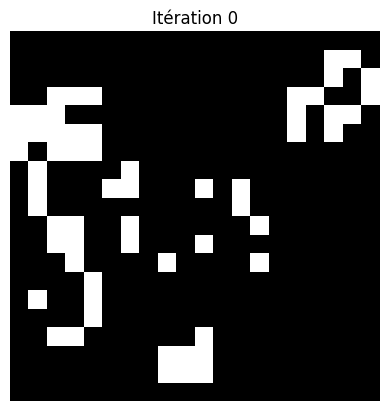

In [31]:
jeu_vie(matrice_aleatoire(20, 0.5), 30)

## Feu de forêt

Nous souhaitons ici modéliser un feu de forêt. Chaque case de la matrice correspondra à un arbre qui peut prendre l'une des valeurs suivantes :
- $0$ : arbre non brûlé.
- $-1$ : arbre complètement brûlé.
- un entier $t \in \mathbb{N}^*$ : arbre en train de brûler, où $t$ est le nombre d'étapes restantes avant que l'arbre ne soit complètement brûlé.

````{admonition} Question
 Écrire une fonction `voisin_brule(M, i, j)` qui renvoie `True` si la case `(i, j)` de la matrice `M` est adjacente à au moins une case contenant un arbre en train de brûler et `False` sinon.
````

À chaque étape :  
- Une case contenant un entier $t > 1$ devient $t-1$ (arbre en train de brûler).  
- Une case contenant $1$ devient $-1$ (arbre complètement brûlé).  
- Une case contenant $0$ qui est adjacente à au moins une case contenant $1$ devient $3$ avec une probabilité $p$ (un arbre qui prend feu brûle pendant $3$ tours). Sinon, cette case reste à $0$.

````{admonition} Question
 Écrire une fonction `regle_feu(M, i, j, p)` qui renvoie l'état de la case `(i, j)` à l'étape suivante, où `p` est la probabilité ci-dessus.
````

````{admonition} Question
 Écrire une fonction `etape_feu(M, p)` qui renvoie la matrice correspondant à l'étape suivante du feu de forêt. Attention : il ne faut pas modifier `M`, mais renvoyer une nouvelle matrice.
````

````{admonition} Question
 Utiliser la fonction `feu_foret` ci-dessous pour afficher l'évolution d'un feu de forêt, en utilisant sa documentation. Tester avec différentes probabilités de propagation du feu.
````

In [62]:
import matplotlib as mpl
from IPython.display import HTML

def feu_foret(M, n, p):
    """Affiche les n premières étapes du jeu de la vie.
    M : matrice initiale
    etape_jeu_vie : fonction qui calcule l'étape suivante
    n : nombre d'étapes
    """
    fig = mpl.pyplot.figure()
    cmap = mpl.colors.ListedColormap(['black', 'green', 'red'])
    bounds = [-1,-0.5, 0.5, 1]
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    def update (i) :
        nonlocal M
        mpl.pyplot.imshow(M, interpolation='nearest', origin='lower', cmap=cmap, norm=norm)
        mpl.pyplot.title(f"Itération {i}")
        if i != 0:
            M = etape_feu(M, p)
    mpl.pyplot.axis('off')
    anim = mpl.animation.FuncAnimation(fig, update, frames=n, interval=300)
    return HTML(anim.to_jshtml())

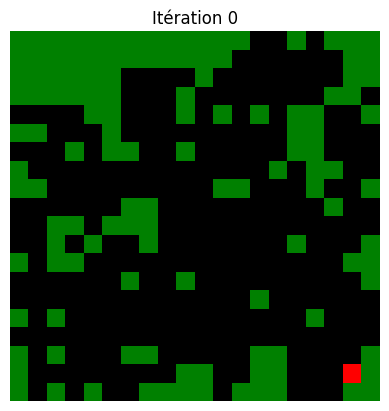

In [67]:
M = np.zeros((20, 20), dtype=int)
M[5][5] = 3 # un arbre en feu initialement
feu_foret(M, 40, 0.15)